# 머신러닝 회귀모델 실습

---

## 실습 목표
- 머신러닝 다양한 모델을 활용하여 회귀분석을 진행해봅니다.
---

## 실습 목차




-  **회귀분석 실습** : **LinearRegression, KNN, SVM, AdaBoost, Bagging, RandomForest** 등 다양한 모델을 구현하는 실습을 진행해봅니다.


---

### 데이터 및 라이브러리 불러오기

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split

전처리 완료한 데이터를 불러옵니다.

**InkjetDB_preprocessing.csv 설명**

Unnamed: 0,Viscosity,Velocity,PrintingSpeed 총 4개의 Feature를 이용해서 
PatternSize의 값을 회귀예측

In [19]:
data_dir = './'
df = pd.read_csv(os.path.join(data_dir, 'InkjetDB_preprocessing.csv'))

X = df.drop(['PatternSize'], axis=1)
y = df['PatternSize']
df

,Unnamed: 0,Viscosity,Velocity,PrintingSpeed,PatternSize
0,1,8,5,150,19
1,5,5,7,50,224
2,17,8,5,125,29
3,19,8,7,25,88
4,24,5,6,175,61
...,...,...,...,...,...
220,965,9,6,50,66
221,966,3,7,150,226
222,975,4,8,175,124
223,978,5,6,25,232


### 학습 및 테스트 데이터세트 분리

---

In [20]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)
X.shape

print('학습 데이터 :' ,X_train.shape)
print('테스트 데이터 : ', X_test.shape)

학습 데이터 : (180, 4)
테스트 데이터 :  (45, 4)


### 선형 회귀(Linear Regression)

---

먼저 선형회귀를 이용해 회귀분석을 진행해보겠습니다. 평가지표는 결정계수와 평균제곱근오차(RMSE)를 사용합니다. 

- **결정계수 ($R^2$)** : 독립 변수가 종속 변수를 얼마나 잘 설명해주는지 보여주는 지표입니다
- **평균제곱근오차** : 추정 값 또는 모델이 예측한 값과 실제 환경에서 관찰되는 값의 차이를 다룰 때 흔히 사용하는 측도로 정밀도(precision)를 표현하는데 적합 각각의 차이값은 잔차(residual)라고도 하며, 평균 제곱근 편차는 잔차들을 하나의 측도로 종합할 때 사용합니다.

- X가 Y와의 상관관계가 클수록 $R^2$의 값은 1에 가까워집니다.
- ($R^2$≥0.65)정도가 되어야 의미있는 회귀식으로 볼 수 있습니다.

#### 기본 회귀 모델 학습 - 선형 회귀 모델

선형 회귀 모델을 학습시켜보겠습니다.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 선형 회귀 모델 정의
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결정 계수 계산
r2 = r2_score(y_test, y_pred)

# 평균 제곱근 오차 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("결정 계수:", r2)
print("평균 제곱근 오차:", rmse)

결정 계수: 0.5737449375648587
평균 제곱근 오차: 51.76703385093554


평가를 마친 이후, 시각화 코드를 통해 실제값과 예측값의 차이를 확인해봅시다. 

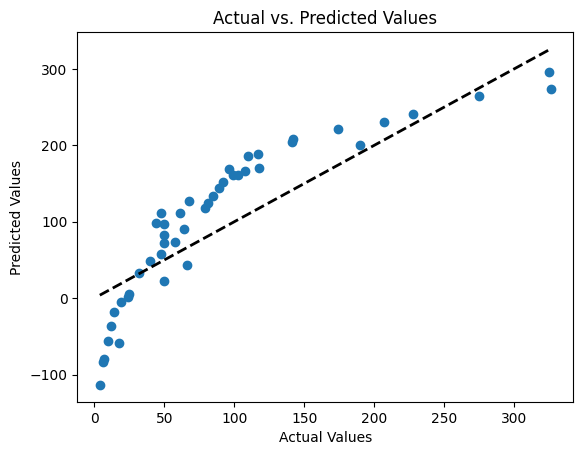

In [22]:
# TODO: langchain을 통해 생성된 코드 입력 (필요시 수정)
# Langchain이 생성한 코드 중 X_train, y_train, X_test, y_test 변수에 새로운 값을 할당하는 코드는 입력하지 말아주세요
import numpy as np
import matplotlib.pyplot as plt

# 모델의 출력값
y_pred = model.predict(X_test)

# 그래프로 시각화
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # 일치하는 직선
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

---

#### 회귀 모델 학습 - KNN Regressor

**KNN Regressor** : 주변의 가장 가까운 K개의 샘플을 통해 값을 예측하는 방식 입니다.

 KNN 회귀 모델을 학습시켜보겠습니다. 데이터의 변수명이 저희가 정의한 변수명과 다를 경우, 이를 조절해줍시다.

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

# KNN 회귀 모델 정의
knn = KNeighborsRegressor()

# 모델 학습
knn.fit(X_train, y_train)

# 예측
y_pred = knn.predict(X_test)

# 결정 계수 계산
r2 = r2_score(y_test, y_pred)

# 평균 제곱근 오차 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("결정 계수:", r2)
print("평균 제곱근 오차:", rmse)

결정 계수: -0.45114177330805294
평균 제곱근 오차: 95.51540655249754


평가를 마친 이후, 시각화 코드를 통해 실제값과 예측값의 차이를 확인해봅시다. 

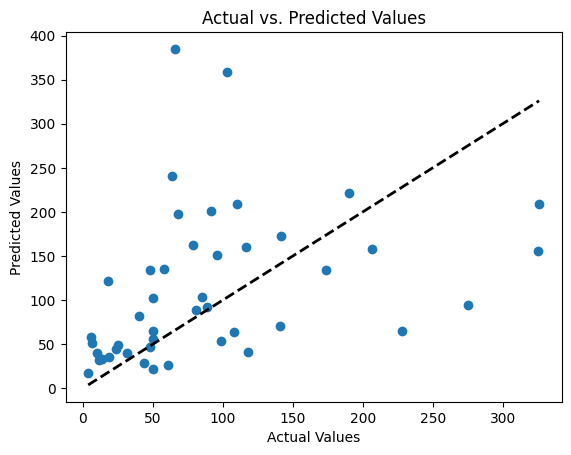

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 모델의 출력값
y_pred = knn.predict(X_test)

# 그래프로 시각화
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # 일치하는 직선
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

--- 

#### 회귀 모델 학습 - SVM
**서포트벡터머신(SVM)** : 주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만드며, 만들어진 분류 모델은 데이터가 사상된 공간에서 경계로 표현되는데 SVM 알고리즘은 그 중 가장 큰 폭을 가진 경계를 찾는 방식입니다.

- **kernel** : 선형 커널
- **C** : 학습 오류에 대한 패널티, C 값이 클 수록 모델이 학습 데이터에 좀 더 최적화 됨, 너무 크면 오버피팅 발생
- **Epsilon** : 임계값, 예측한 값이 GT 범위 안에 있으면 패널티 부여 X

SVM을 학습시켜보겠습니다.

In [25]:
# TODO: langchain을 통해 생성된 코드 입력 (필요시 수정)
# Langchain이 생성한 코드 중 X_train, y_train, X_test, y_test 변수에 새로운 값을 할당하는 코드는 입력하지 말아주세요
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# SVM 회귀 모델 정의
svm_regressor = SVR()

# 모델 학습
svm_regressor.fit(X_train, y_train)

# 예측
y_pred = svm_regressor.predict(X_test)

# 결정 계수 계산
r2 = r2_score(y_test, y_pred)

# 평균 제곱근 오차 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("결정 계수: ", r2)
print("평균 제곱근 오차: ", rmse)

결정 계수:  -0.03136053271001882
평균 제곱근 오차:  80.5237071230051


평가를 마친 이후, 시각화 코드를 통해 실제값과 예측값의 차이를 확인해봅시다.

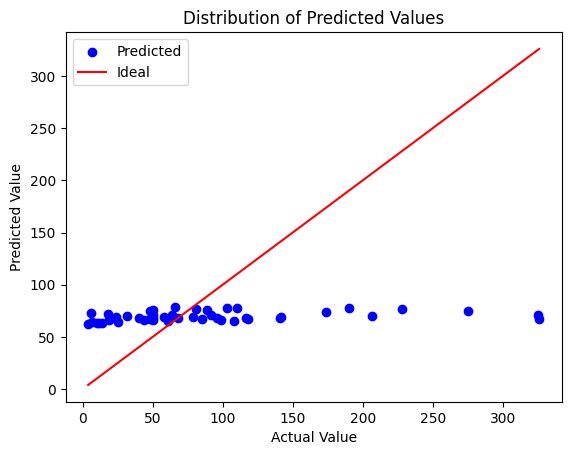

In [26]:
# 그래프 그리기
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Distribution of Predicted Values')
plt.legend()
plt.show()

---

#### 회귀 모델 학습 - AdaBoost

**Adaptive Boost** : Adaptive + Boosting 로 만들어진 단어로 약한 분류기(weak classifier)들이 상호보완 하도록 순차적(sequential)으로 학습하고, 이들을 조합하여 최종적으로 강한 분류기(strong classifier)의 성능을 향상시키는 것

Chain이 생성한 코드를 사용해서 선형 회귀 모델을 학습시켜보겠습니다. 데이터의 변수명이 저희가 정의한 변수명과 다를 경우, 이를 조절해줍시다.

In [27]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

# AdaBoost 회귀 모델 정의
model = AdaBoostRegressor()

# 모델 학습
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 결정 계수 계산
r2 = r2_score(y_test, y_pred)

# 평균 제곱근 오차 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("결정 계수:", r2)
print("평균 제곱근 오차:", rmse)

결정 계수: 0.8866480717940791
평균 제곱근 오차: 26.695186703174137


평가를 마친 이후, 시각화 코드를 통해 실제값과 예측값의 차이를 확인해봅시다. 

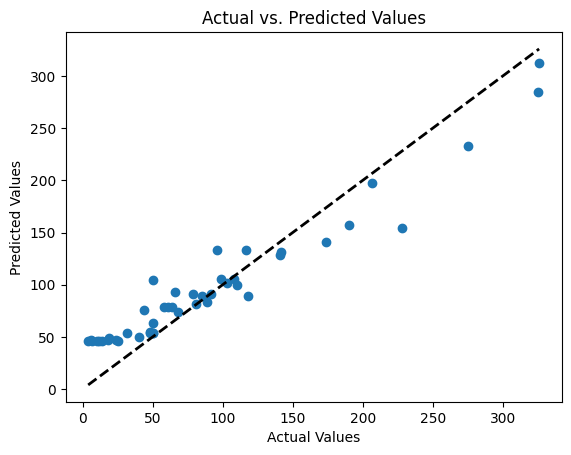

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 모델의 출력값
y_pred = model.predict(X_test)

# 그래프로 시각화
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # 일치하는 직선
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

---

#### 회귀 모델 학습 - bagging

**배깅(Bagging)** : Bootstrap Aggregation의 약자로 샘플을 여러 번 뽑아 각 모델을 학습시켜 결과물을 집계하는 방법

Bagging 모델을 학습시켜보겠습니다. 

In [29]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Bagging 회귀 모델 정의
bagging_model = BaggingRegressor()

# 모델 학습
bagging_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = bagging_model.predict(X_test)

# 결정 계수 계산
r2 = r2_score(y_test, y_pred)

# 평균 제곱근 오차 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("결정 계수:", r2)
print("평균 제곱근 오차:", rmse)

결정 계수: 0.9394332065089067
평균 제곱근 오차: 19.513528071001865


평가를 마친 이후, 시각화 코드를 통해 실제값과 예측값의 차이를 확인해봅시다. 

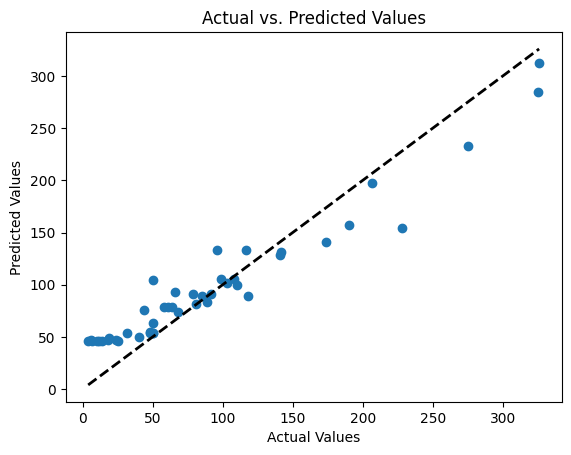

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 모델의 출력값
y_pred = model.predict(X_test)

# 그래프로 시각화
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # 일치하는 직선
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

---

#### 회귀 모델 학습 - Decision Tree

Decision Tree 모델을 학습시켜보겠습니다.

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Decision Tree 회귀 모델 정의
model = DecisionTreeRegressor()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결정 계수 계산
r2 = r2_score(y_test, y_pred)

# 평균 제곱근 오차 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("결정 계수:", r2)
print("평균 제곱근 오차:", rmse)

결정 계수: 0.8880424501291573
평균 제곱근 오차: 26.530485609326238


평가를 마친 이후, 시각화 코드를 통해 실제값과 예측값의 차이를 확인해봅시다. 

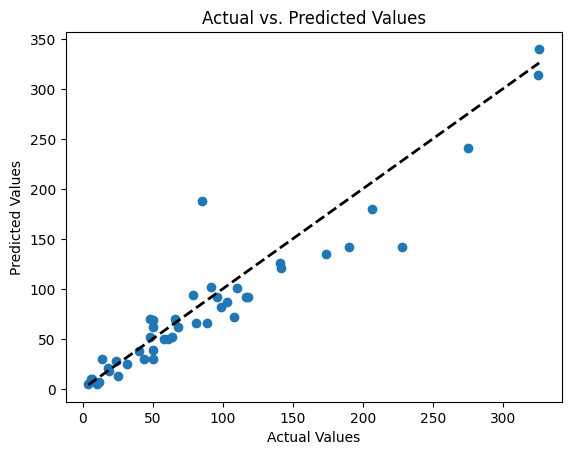

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# 모델의 출력값
y_pred = model.predict(X_test)

# 그래프로 시각화
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # 일치하는 직선
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

---

#### 회귀 모델 학습 - RandomForest

**랜덤포레스트** : 분류, 회귀 분석 등에 사용되는 앙상블 학습 방법의 일종으로, 훈련 과정에서 구성한 다수의 결정 트리로부터 분류 또는 회귀 분석을 수행

RandomForest 모델을 학습시켜보겠습니다. 

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Random Forest 회귀 모델 정의
model = RandomForestRegressor()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결정 계수 계산
r2 = r2_score(y_test, y_pred)

# 평균 제곱근 오차 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("결정 계수:", r2)
print("평균 제곱근 오차:", rmse)

결정 계수: 0.94991709471678
평균 제곱근 오차: 17.744479454498265


평가를 마친 이후, 시각화 코드를 통해 실제값과 예측값의 차이를 확인해봅시다.

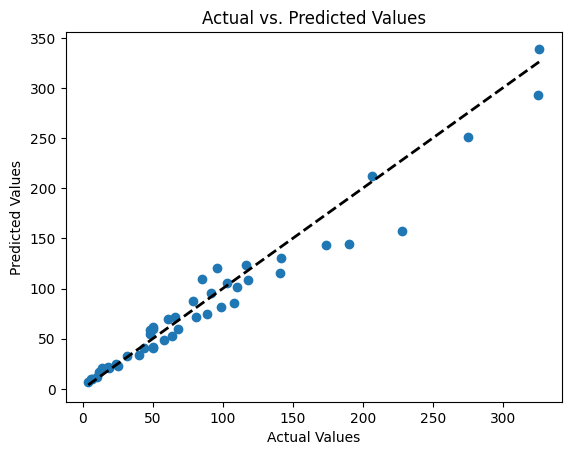

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 모델의 출력값
y_pred = model.predict(X_test)

# 그래프로 시각화
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # 일치하는 직선
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()